# Matplotlib Plotting Functions Tutorial

## Introduction

This tutorial explores the diverse visualization capabilities in Matplotlib, Python's leading plotting library. While Matplotlib offers dozens of plot types for different data analysis needs, we'll focus on the most essential and widely used visualization techniques that form the foundation of data visualization in Python.

We'll progress from basic 1D plots through to more complex visualizations, providing practical examples that you can adapt to your own data analysis workflows.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For higher quality plots in Jupyter notebooks
%config InlineBackend.figure_format = 'retina'

# Set a consistent seed for reproducible examples
np.random.seed(42)

## Overview of Plot Types

Matplotlib provides a comprehensive plotting system for visualizing different types of data. Here's an overview of the most common plot types organized by data dimensionality and visualization purpose:

### 1D Data Visualizations
* `plot()` - Line plots for trends over a continuous variable
* `scatter()` - Point plots showing relationships between variables
* `bar()` / `barh()` - Bar charts for comparing categorical data
* `fill_between()` - Area plots showing ranges or confidence intervals

### 2D Data & Images
* `imshow()` - Display data as an image with interpolation options
* `pcolor()` / `pcolormesh()` - Create pseudocolor plots from a 2D array
* `contour()` / `contourf()` - Create contour plots from 2D data

### Vector Fields
* `quiver()` - Plot a 2D field of arrows
* `streamplot()` - Plot streamlines of a vector field

### Statistical Visualizations
* `hist()` - Create histograms to visualize distributions
* `boxplot()` - Display distribution statistics with box and whisker plots
* `violinplot()` - Similar to boxplot but showing the probability density

# Detailed Examples (of a few of these)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

# Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`
<img src="images/bar_example.png">

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

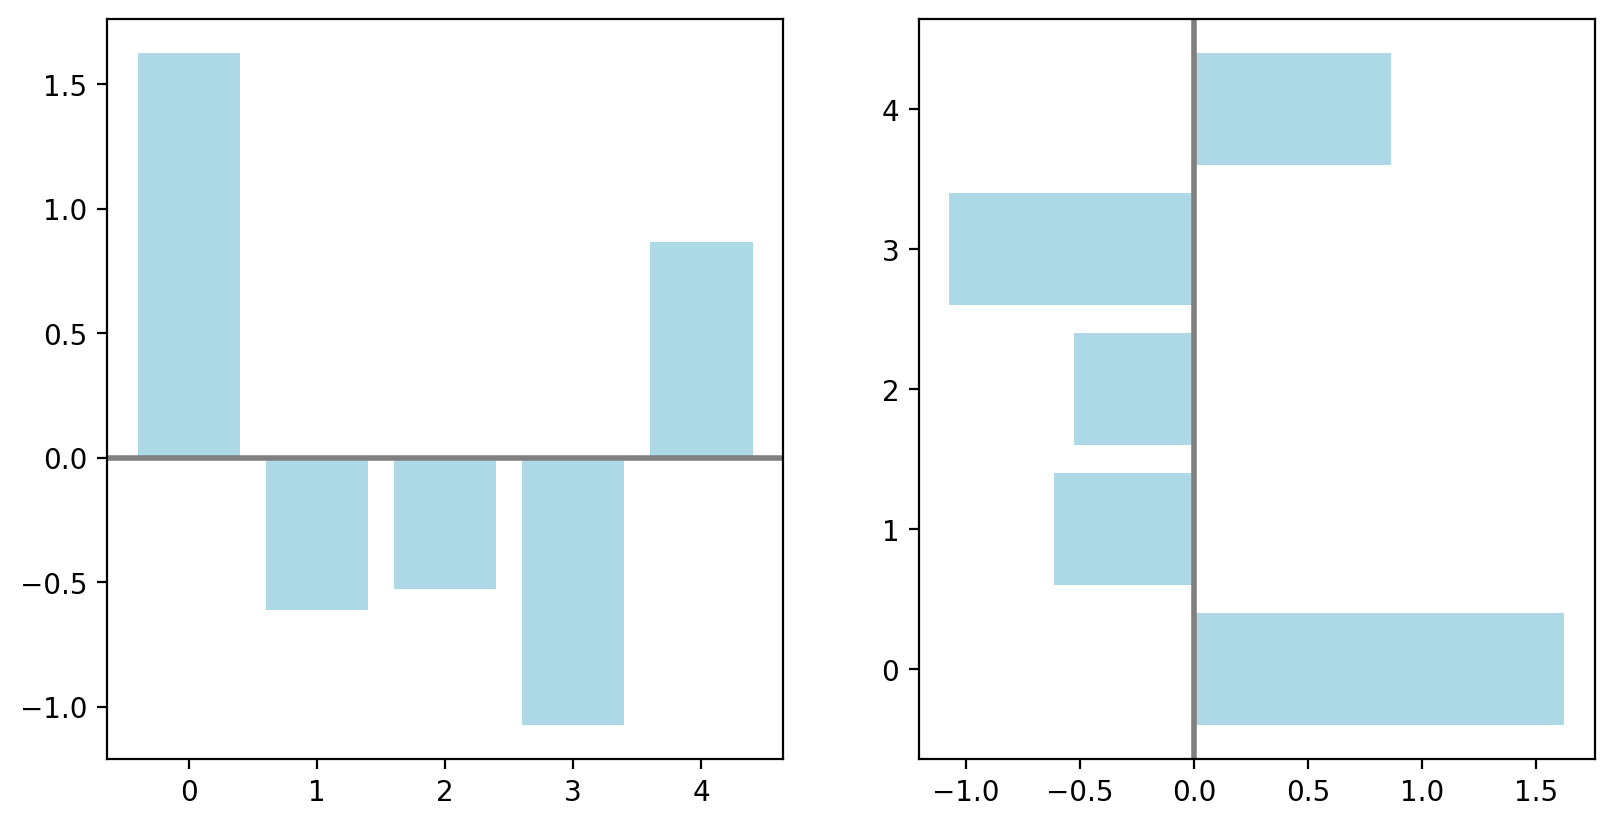

In [3]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

Note that we held on to what `ax.bar(...)` returned.  Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

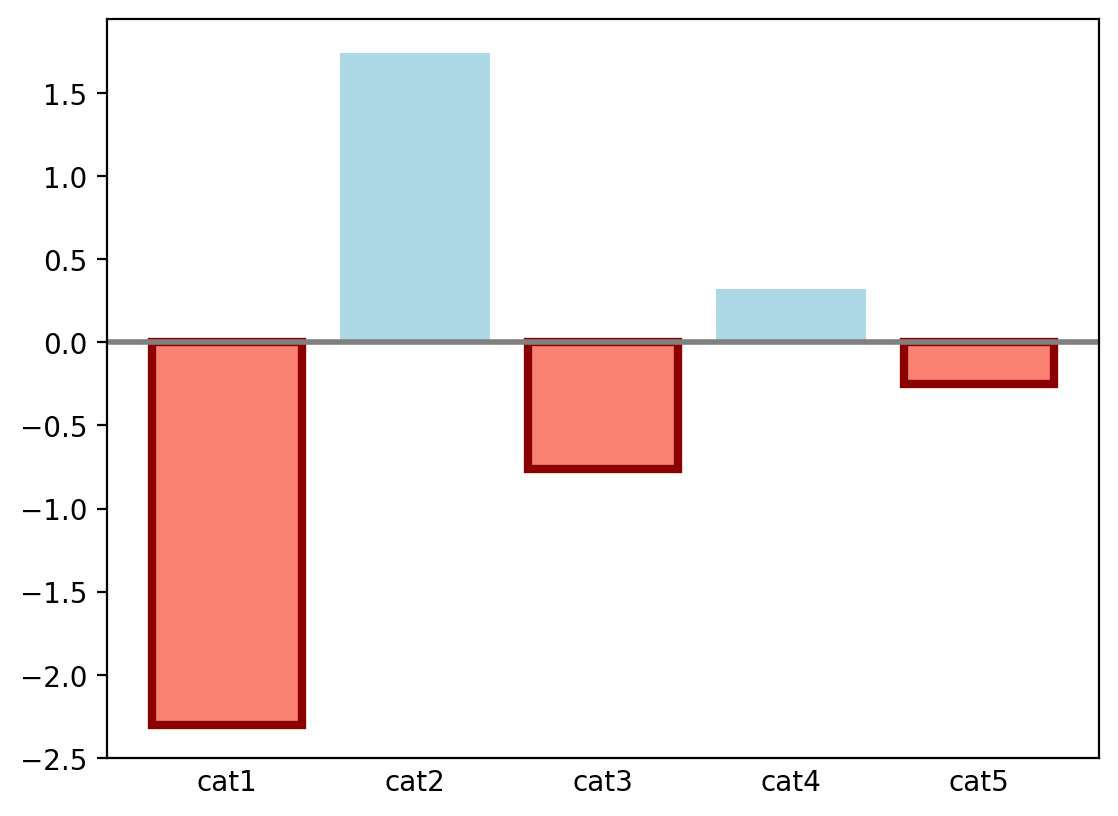

In [4]:
fig, ax = plt.subplots()

# Use np.arange(5) for x values like in cell 5
x_bars = np.arange(5)
y_bars = np.random.randn(5)  # Generate random data for demonstration

vert_bars = ax.bar(x_bars, y_bars, color='lightblue', align='center')
# remove the xticks marks
ax.tick_params(axis='x', length=0)
# add the xticks labels
ax.set_xticks(x_bars, labels=["cat1", "cat2", "cat3", "cat4", "cat5"])

# Add a horizontal line at y=0 to better visualize positive vs. negative values
ax.axhline(0, color='gray', linewidth=2)

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y_bars):
    if height < 0:
        bar.set(facecolor='salmon', edgecolor='darkred', linewidth=3)

Keep in mind that any plotting method in matplotlib returns the artists that are plotted. We'll use it again, particularly when we get to adding colorbars to images.

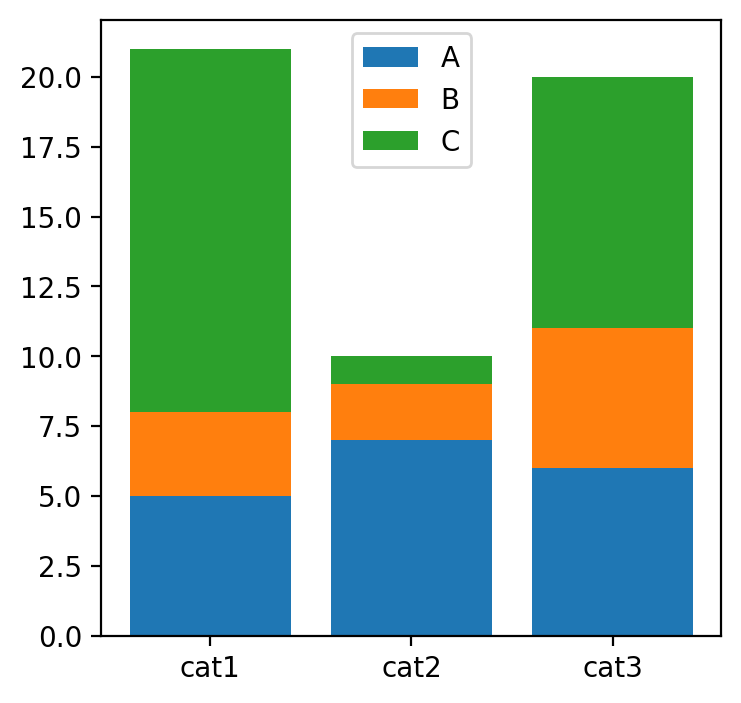

In [5]:
import pandas as pd
import numpy as np

# Define the data
categories = ['cat1', 'cat2', 'cat3']
values_A = np.array([5, 7, 6])
values_B = np.array([3, 2, 5])
values_C = np.array([13, 1, 9])


fig, ax = plt.subplots(figsize=(4,4))

# Create a bar chart for 'A'
ax.bar(categories, values_A, label='A')
# Create a bar chart for 'B', stacked on top of 'A'
ax.bar(categories, values_B, bottom=values_A, label='B')
ax.bar(categories, values_C, bottom=values_A+values_B, label='C')

# Add legend
ax.legend()

### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc
<img src="images/fill_example.png">

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

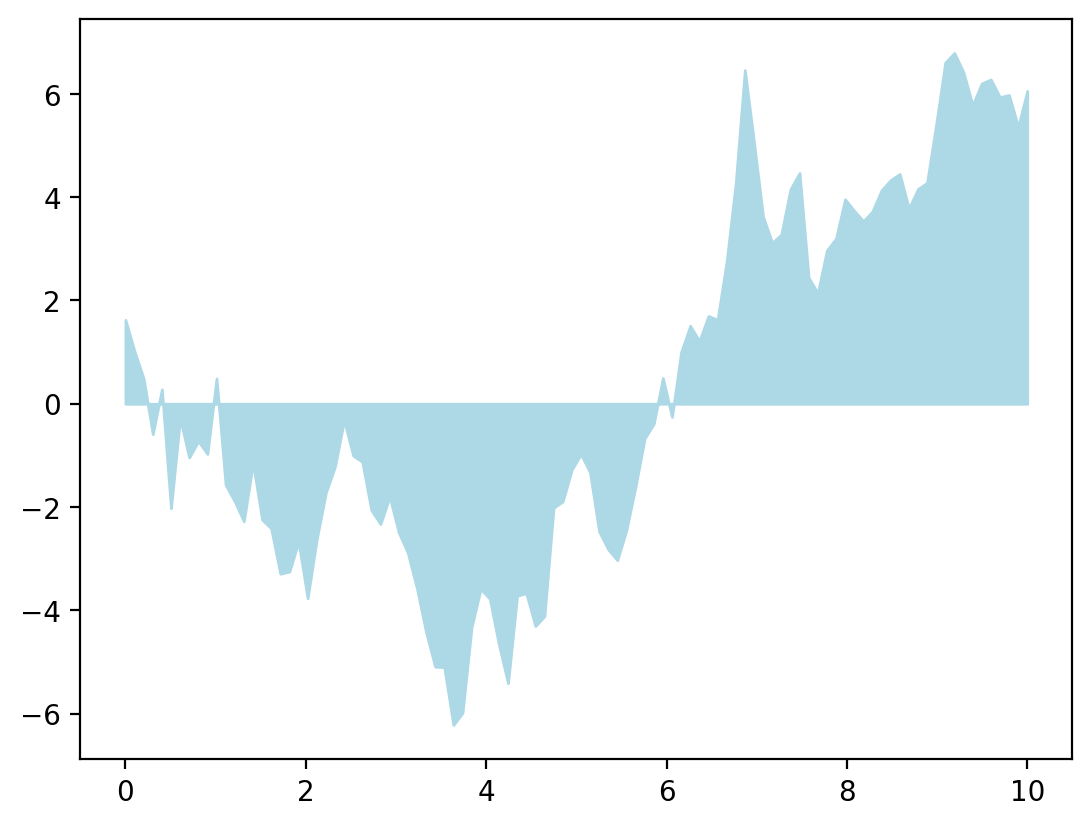

In [6]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')


However, it can also be used to fill between two curves.  This is particularly useful when you want to show an envelope of some sort (e.g. error, confidence, amplitude, etc).

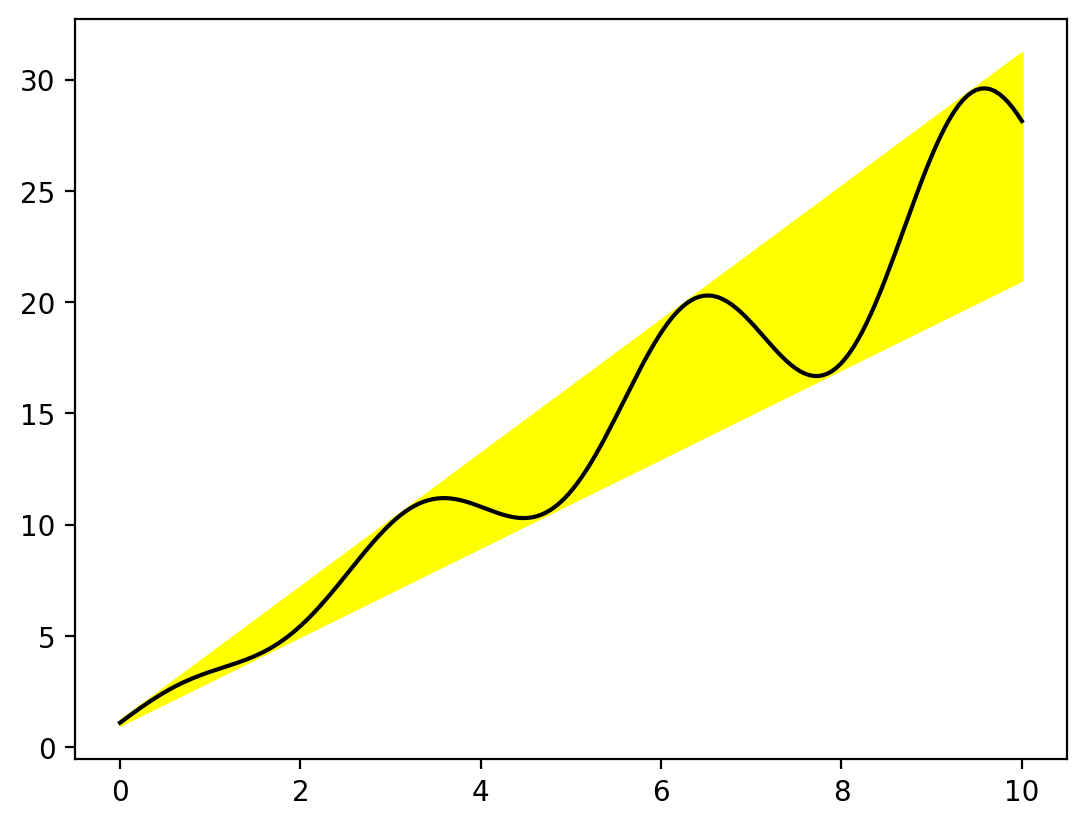

In [7]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

## `data` keyword argument
When using specialized data structures such as Pandas DataFrame and XArray, the input data to be plotted are accessed like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the `data` keyword argument was added to many of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

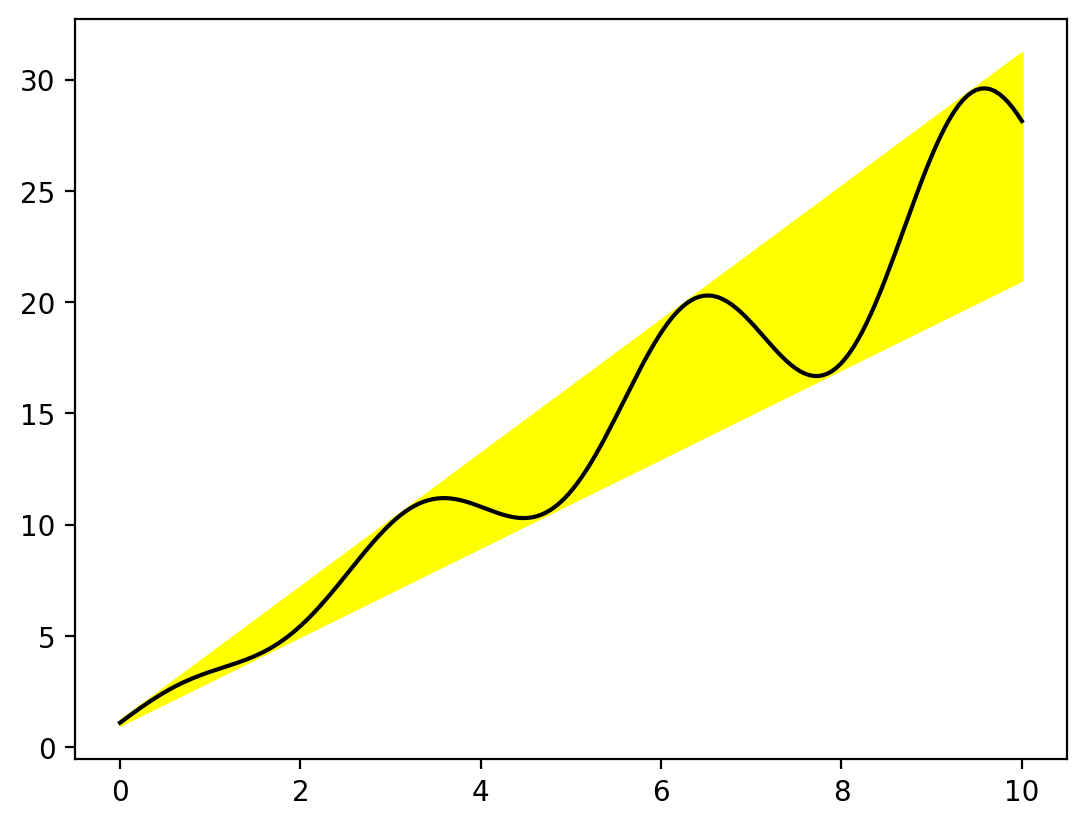

In [8]:
x = np.linspace(0, 10, 200)
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between('x', 'y1', 'y2', color='yellow', data=data_obj)

# Plot the "centerline" with `plot`
ax.plot('x', 'mean', color='black', data=data_obj)

plt.show()

# Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image below is meant to clarify that somewhat.

<img src="images/imshow_example.png">
<img src="images/pcolor_example.png">

In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

### Colorbars

Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

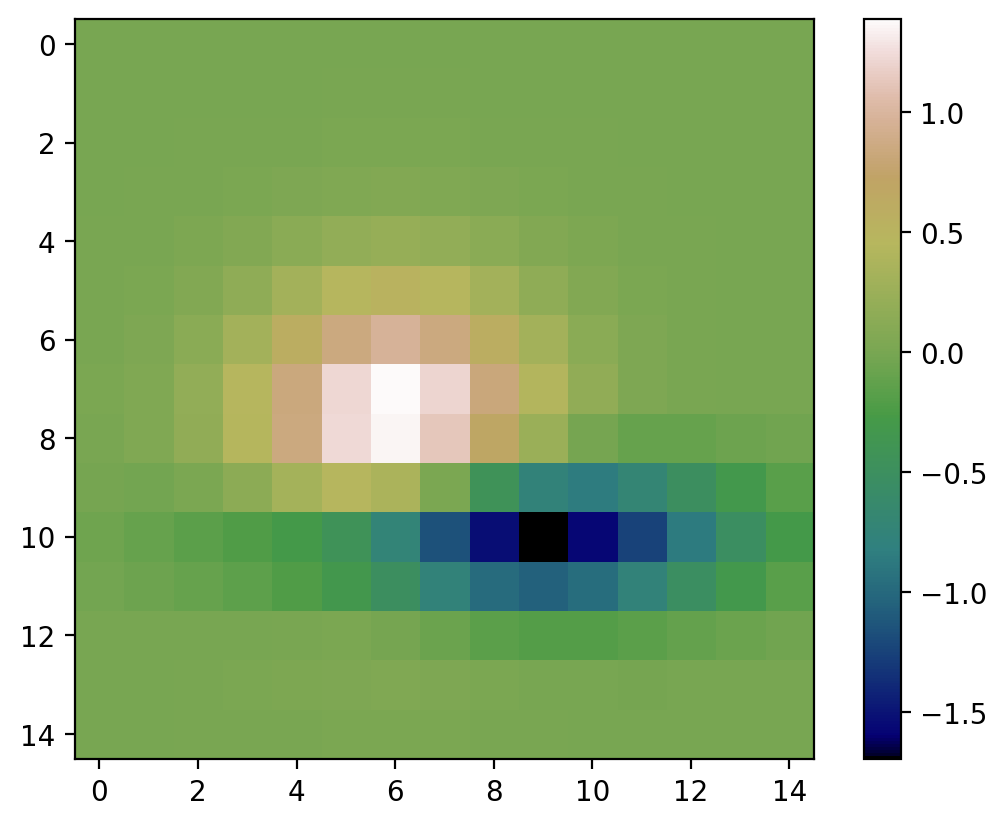

In [9]:
data = np.load('./data/bivariate_normal.npy')

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='gist_earth')
fig.colorbar(im)

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

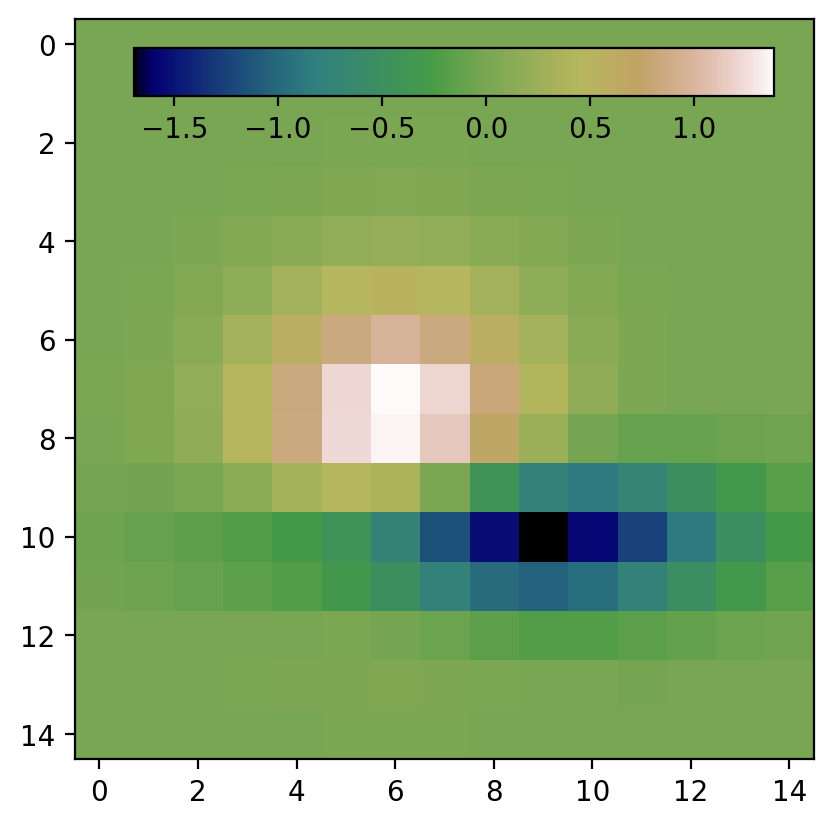

In [10]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(data, cmap='gist_earth')
fig.colorbar(im, cax=cax, orientation='horizontal')

One note: In the last module in this tutorial, we'll briefly cover `axes_grid`, which is very useful for aligning colorbars and/or other axes with images displayed with `imshow`.  

  ### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

As an example of that, let's use a divergent colormap with the data we showed earlier. We'll also use `interpolation="nearest"` to "turn off" interpolation of the cells in the input dataset:

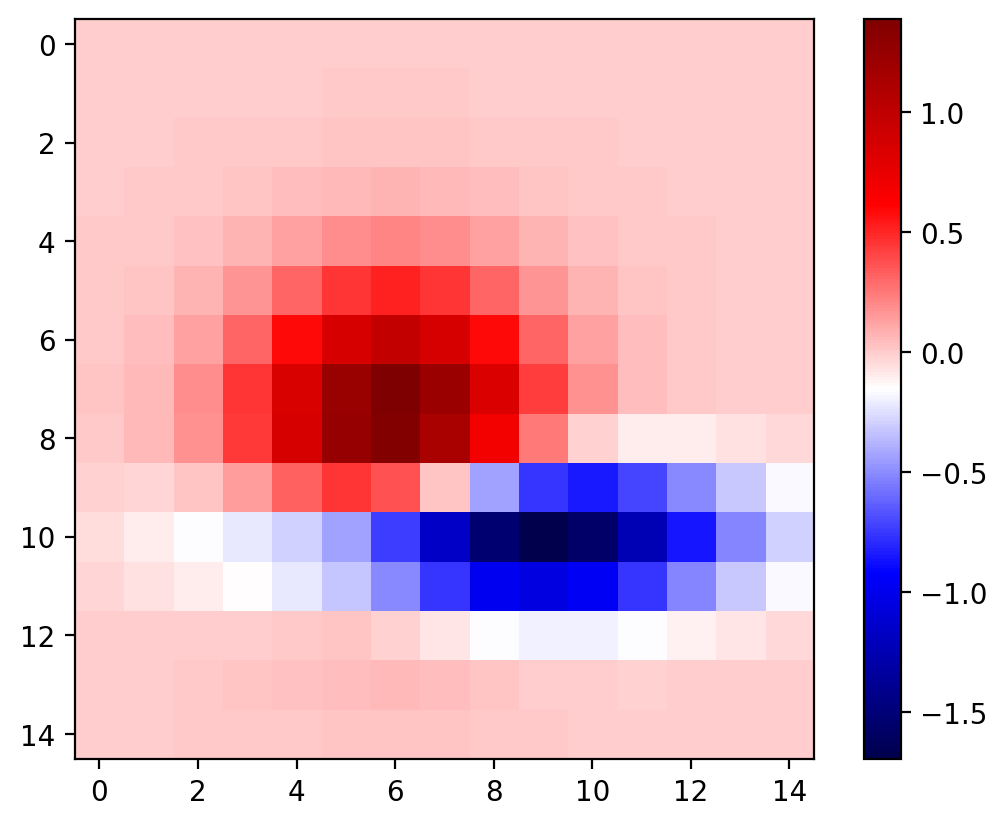

In [11]:
data = np.load('data/bivariate_normal.npy')

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', interpolation='nearest')
fig.colorbar(im)

In this case, we'd really like the white in the colormap to correspond to 0.  A quick way to do this is to make the `vmin` equal to the negative of the `vmax`.  

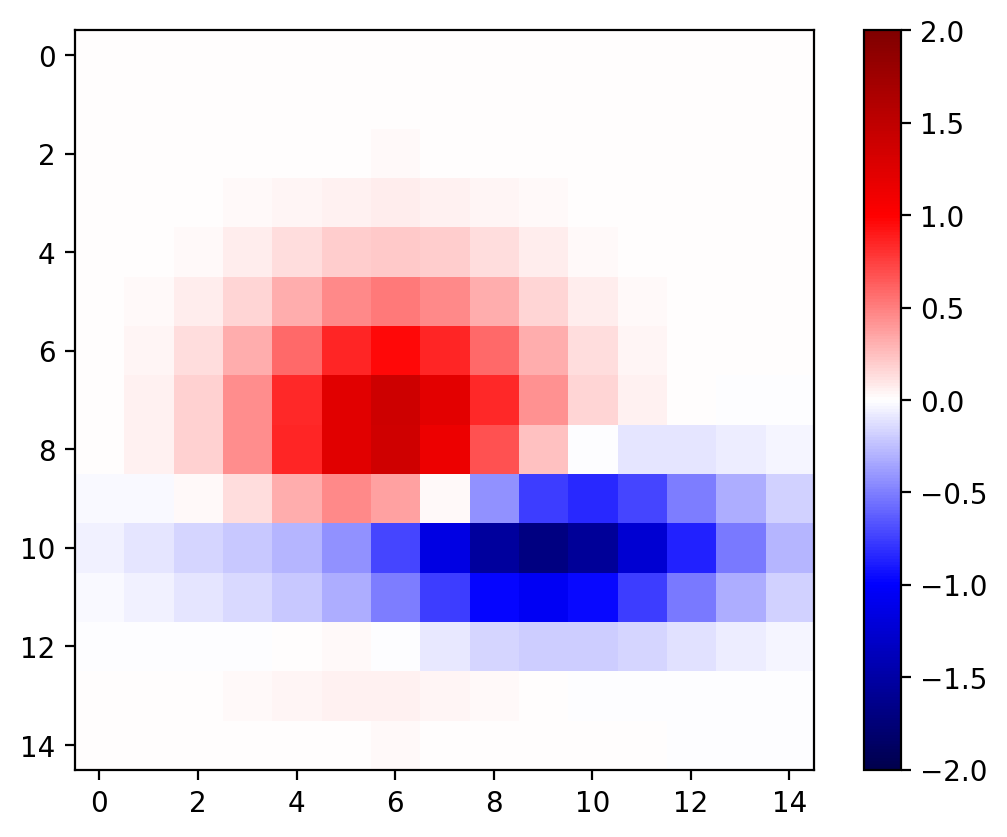

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', interpolation='nearest',
               vmin=-2, vmax=2)
fig.colorbar(im)

`vmin` and `vmax` are also very useful when we want multiple plots to share one colorbar.

## Contour Plots

Contour plots are useful for visualizing 3D surfaces on a 2D plane, similar to topographic maps. Matplotlib offers two main functions for contour plots:

- `contour()`: Creates line contours
- `contourf()`: Creates filled contours

Let's create an example of both types using a 2D Gaussian function:

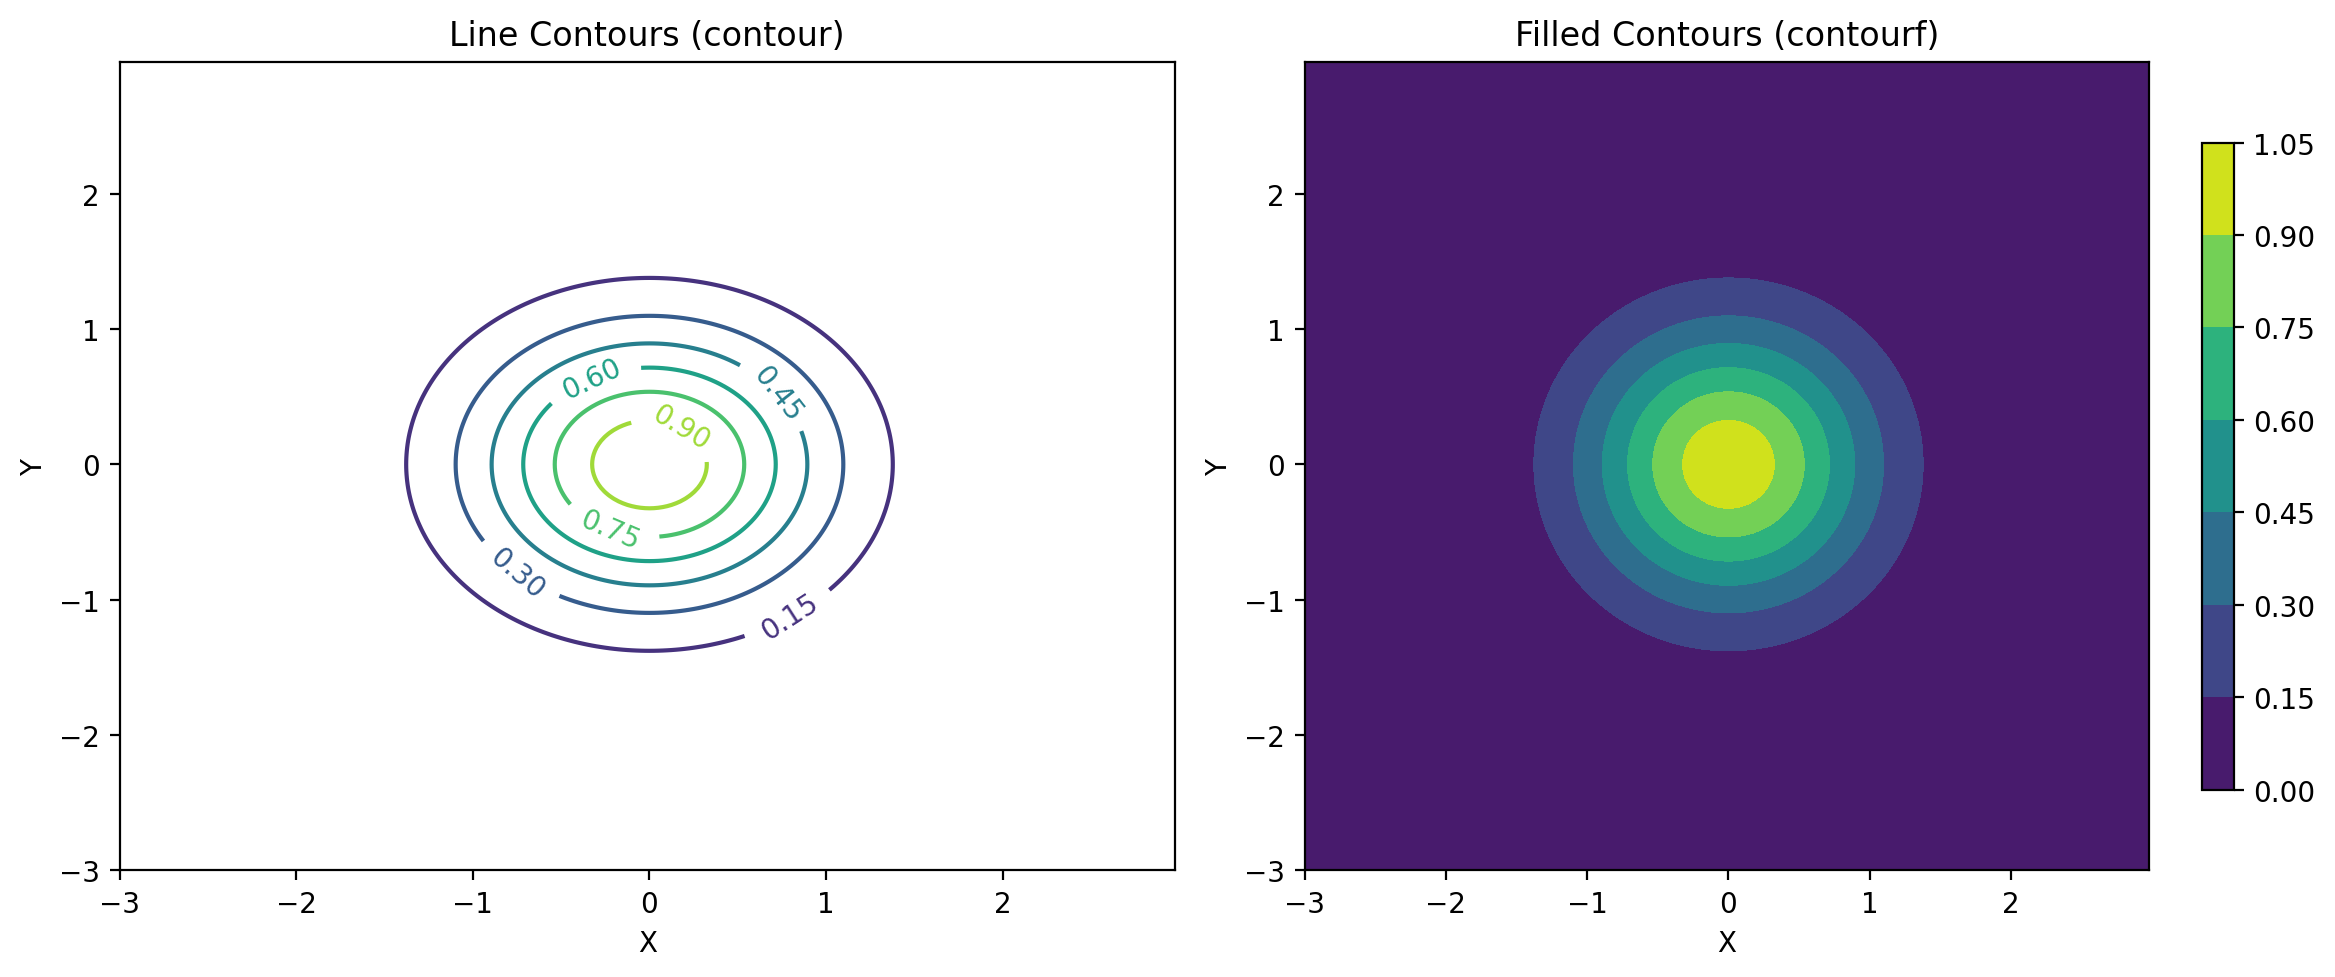

In [13]:
# Create a 2D grid of points
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

# Calculate Z values (heights) as a function of X and Y
Z = np.exp(-(X**2 + Y**2))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot line contours
cs1 = ax1.contour(X, Y, Z, levels=8, cmap='viridis')
ax1.set_title('Line Contours (contour)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
# Add contour labels
ax1.clabel(cs1, inline=1, fontsize=10)

# Plot filled contours
cs2 = ax2.contourf(X, Y, Z, levels=8, cmap='viridis')
ax2.set_title('Filled Contours (contourf)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Add colorbar
fig.colorbar(cs2, ax=ax2, shrink=0.8)

plt.tight_layout()
plt.show()

# Statistical Visualizations

Matplotlib provides several functions for statistical visualization that help understand data distributions and relationships.

## Histograms with `hist()`

Histograms are one of the most fundamental statistical plots, showing the distribution of data by dividing it into bins and counting the number of observations in each bin.

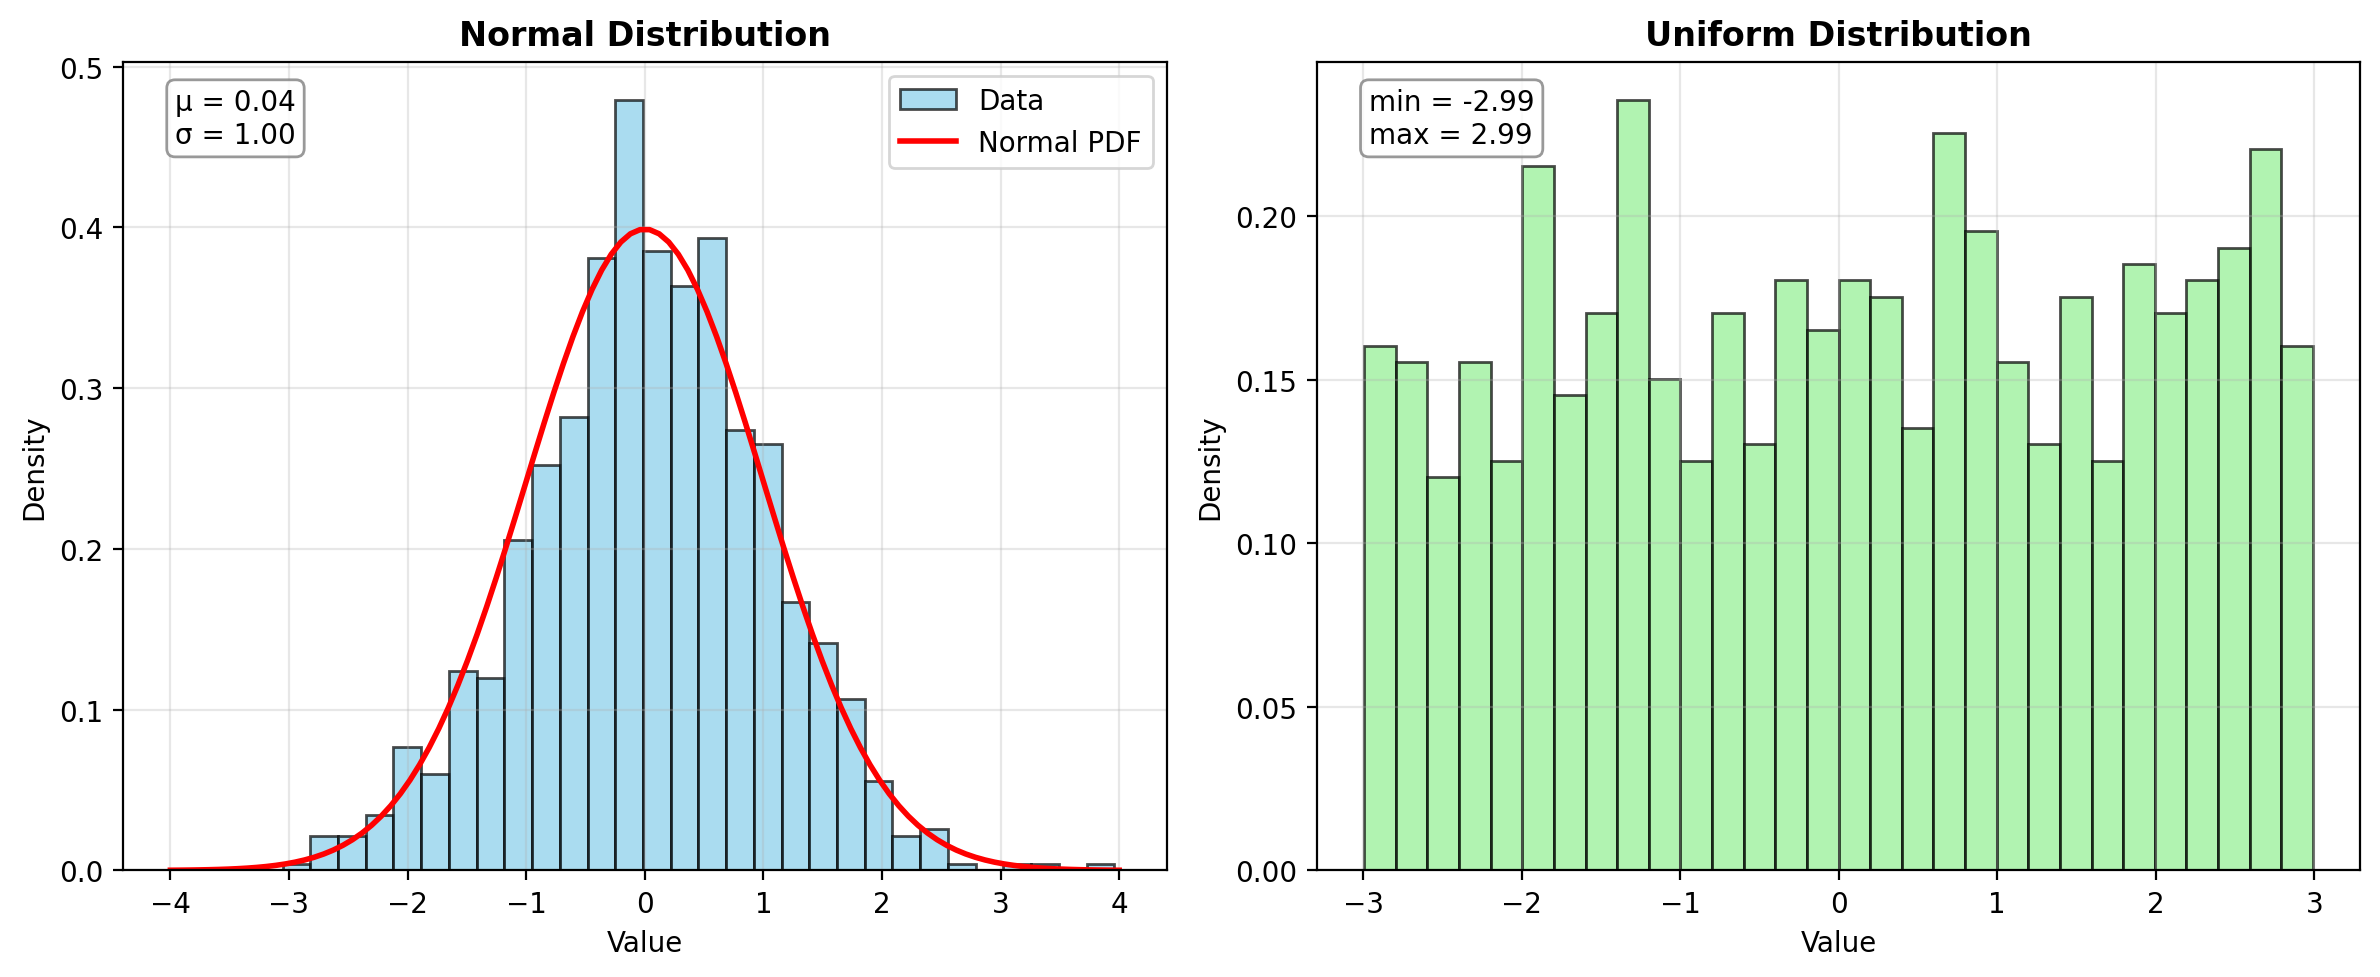

In [14]:
# Generate sample data
normal_data = np.random.normal(0, 1, 1000)  # Normal distribution with mean=0, std=1
uniform_data = np.random.uniform(-3, 3, 1000)  # Uniform distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a histogram of normally distributed data with density curve
ax1.hist(normal_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', 
         density=True, label='Data')
ax1.set_title('Normal Distribution', fontweight='bold')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.grid(alpha=0.3)

# Add normal distribution curve
x = np.linspace(-4, 4, 100)
y = 1/(1 * np.sqrt(2 * np.pi)) * np.exp(-(x - 0)**2 / (2 * 1**2))
ax1.plot(x, y, 'r-', linewidth=2, label='Normal PDF')
ax1.legend()

# Create a histogram of uniformly distributed data
ax2.hist(uniform_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black', 
         density=True, label='Data')
ax2.set_title('Uniform Distribution', fontweight='bold')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.grid(alpha=0.3)

# Add statistical annotations
ax1.annotate(f'μ = {normal_data.mean():.2f}\nσ = {normal_data.std():.2f}', 
             xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

ax2.annotate(f'min = {uniform_data.min():.2f}\nmax = {uniform_data.max():.2f}', 
             xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

## Box and Violin Plots

Box plots and violin plots are powerful tools for visualizing data distributions, particularly for comparing multiple datasets side by side.

- **Box plots** show the quartiles of the dataset with whiskers extending to show the range of the data:
    - The box represents the interquartile range (IQR) from 25th to 75th percentile
    - The line across the box shows the median (50th percentile)
    - Whiskers typically extend to the most extreme data points within 1.5 × IQR
    - Points beyond the whiskers are often plotted individually as outliers

- **Violin plots** combine box plot information with kernel density estimates:
    - The width of the "violin" represents the density of data points
    - Wider sections indicate more data points at that value
    - They reveal multimodality, skewness, and other distribution features that box plots might hide
    - Often include a marker for the median and sometimes for quartiles

These visualizations excel when comparing distributions across different categories or groups, allowing you to quickly identify differences in central tendency, spread, skewness, and potential outliers.

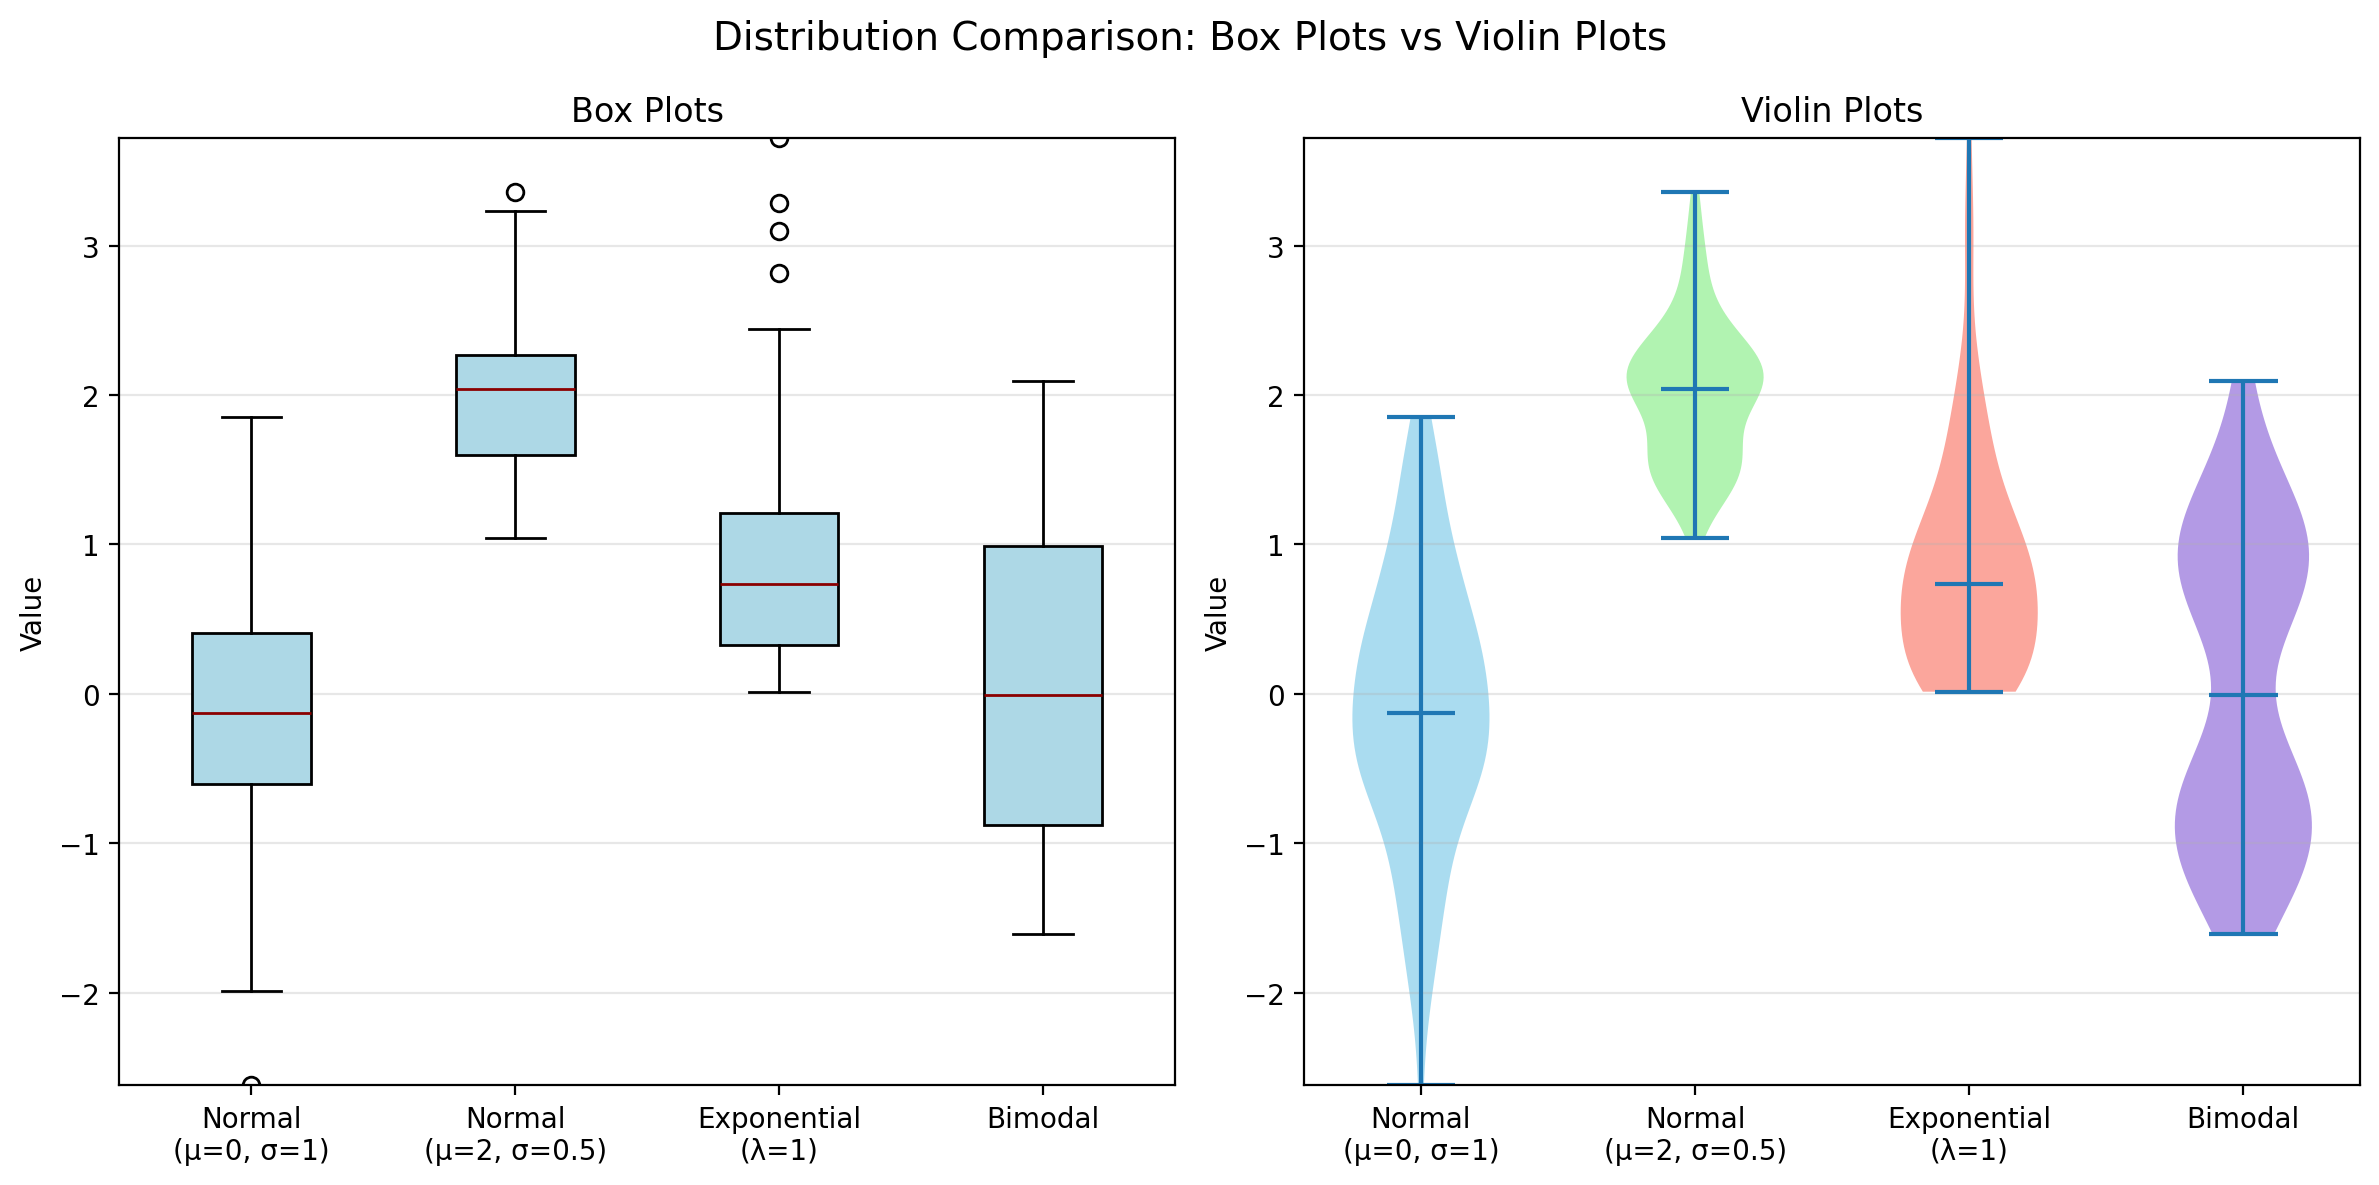

In [15]:
# Generate several different distributions
np.random.seed(42)
data = [
    np.random.normal(0, 1, 100),     # Normal distribution, mean=0, std=1
    np.random.normal(2, 0.5, 100),   # Normal distribution, mean=2, std=0.5
    np.random.exponential(1, 100),   # Exponential distribution
    np.concatenate([np.random.normal(-1, 0.5, 50), np.random.normal(1, 0.5, 50)])  # Bimodal
]

labels = ['Normal\n(μ=0, σ=1)', 'Normal\n(μ=2, σ=0.5)', 'Exponential\n(λ=1)', 'Bimodal']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribution Comparison: Box Plots vs Violin Plots', fontsize=14)

# Create box plots - using tick_labels instead of labels (fixes deprecation warning)
ax1.boxplot(data, tick_labels=labels, patch_artist=True, 
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='darkred'))
ax1.set_title('Box Plots')
ax1.set_ylabel('Value')
ax1.grid(axis='y', alpha=0.3)

# Create violin plots
violins = ax2.violinplot(data, showmedians=True)
ax2.set_xticks(np.arange(1, len(labels) + 1))
ax2.set_xticklabels(labels)
ax2.set_title('Violin Plots')
ax2.set_ylabel('Value')
ax2.grid(axis='y', alpha=0.3)

# Add custom colors to violin plots
for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(['skyblue', 'lightgreen', 'salmon', 'mediumpurple'][i % 4])
    pc.set_alpha(0.7)

# Ensure both plots use the same y-axis limits for better comparison
y_min = min([min(d) for d in data])
y_max = max([max(d) for d in data])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

## Conclusion

This tutorial has covered the core plotting functions in Matplotlib, from simple line and bar plots to more complex visualizations like contours and statistical plots. Key takeaways include:

1. **Choose the right plot type** for your data and analysis goals
2. **Customize your visualizations** using Matplotlib's extensive options for colors, markers, and styles
3. **Use colorbars and appropriate colormaps** to effectively represent your data
4. **Combine different plot types** for richer, more insightful visualizations

Matplotlib's flexibility allows you to create virtually any type of visualization you might need for data analysis and presentation. As you become more comfortable with these basic plot types, you can explore more advanced features and combinations to create powerful custom visualizations.